This code takes some 4 to 5 hours to run!

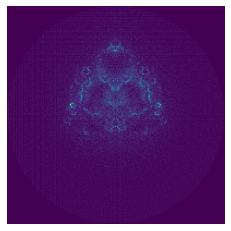

In [ ]:
from multiprocessing import Pool
from random import randrange
import matplotlib.pyplot as plt
import numpy as np


cores         = 4
maxiter       = 10000
points        = 1000000
width, height = 200, 200
rdom, idom    = (-2, 2), (-2, 2)

xdom, ydom    = (0, width - 1), (0, height - 1)

def randomComplex():
  r = np.interp(randrange(xdom[0], xdom[1]), xdom, rdom)
  i = np.interp(randrange(ydom[0], ydom[1]), ydom, idom)
  return (r, i)

def complex2pixel(c):
  x = int(np.interp(c[0], rdom, xdom))
  y = int(np.interp(c[1], idom, ydom))
  return (x, y)

def escapedPixels(c):
  pixels, z = {}, c
  for i in range(maxiter):
    z2 = (z[0] * z[0], z[1] * z[1])
    if z2[0] + z2[1] > 4: break
    p = complex2pixel(z)
    try: pixels[p] += 1
    except: pixels[p] = 1
    z = (z2[0] - z2[1] + c[0], 2 * z[0] * z[1] + c[1])
  return pixels if i < maxiter - 1 else {}

if __name__ == '__main__':
  with Pool(cores) as p:
    ds = p.map(escapedPixels, (randomComplex() for i in range(points)))
  m = np.zeros((width, height))
  for d in ds:
    for p in d:
      m[p] += d[p]
  plt.axis('off')
  plt.imshow(m)
  plt.show()